In [71]:
#Importing necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [72]:
#Loading the Dataset
df = pd.read_csv('Dataset.csv')

In [73]:
#viewing first few rows
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [74]:
#checking dtypes
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [75]:
#checking any null values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

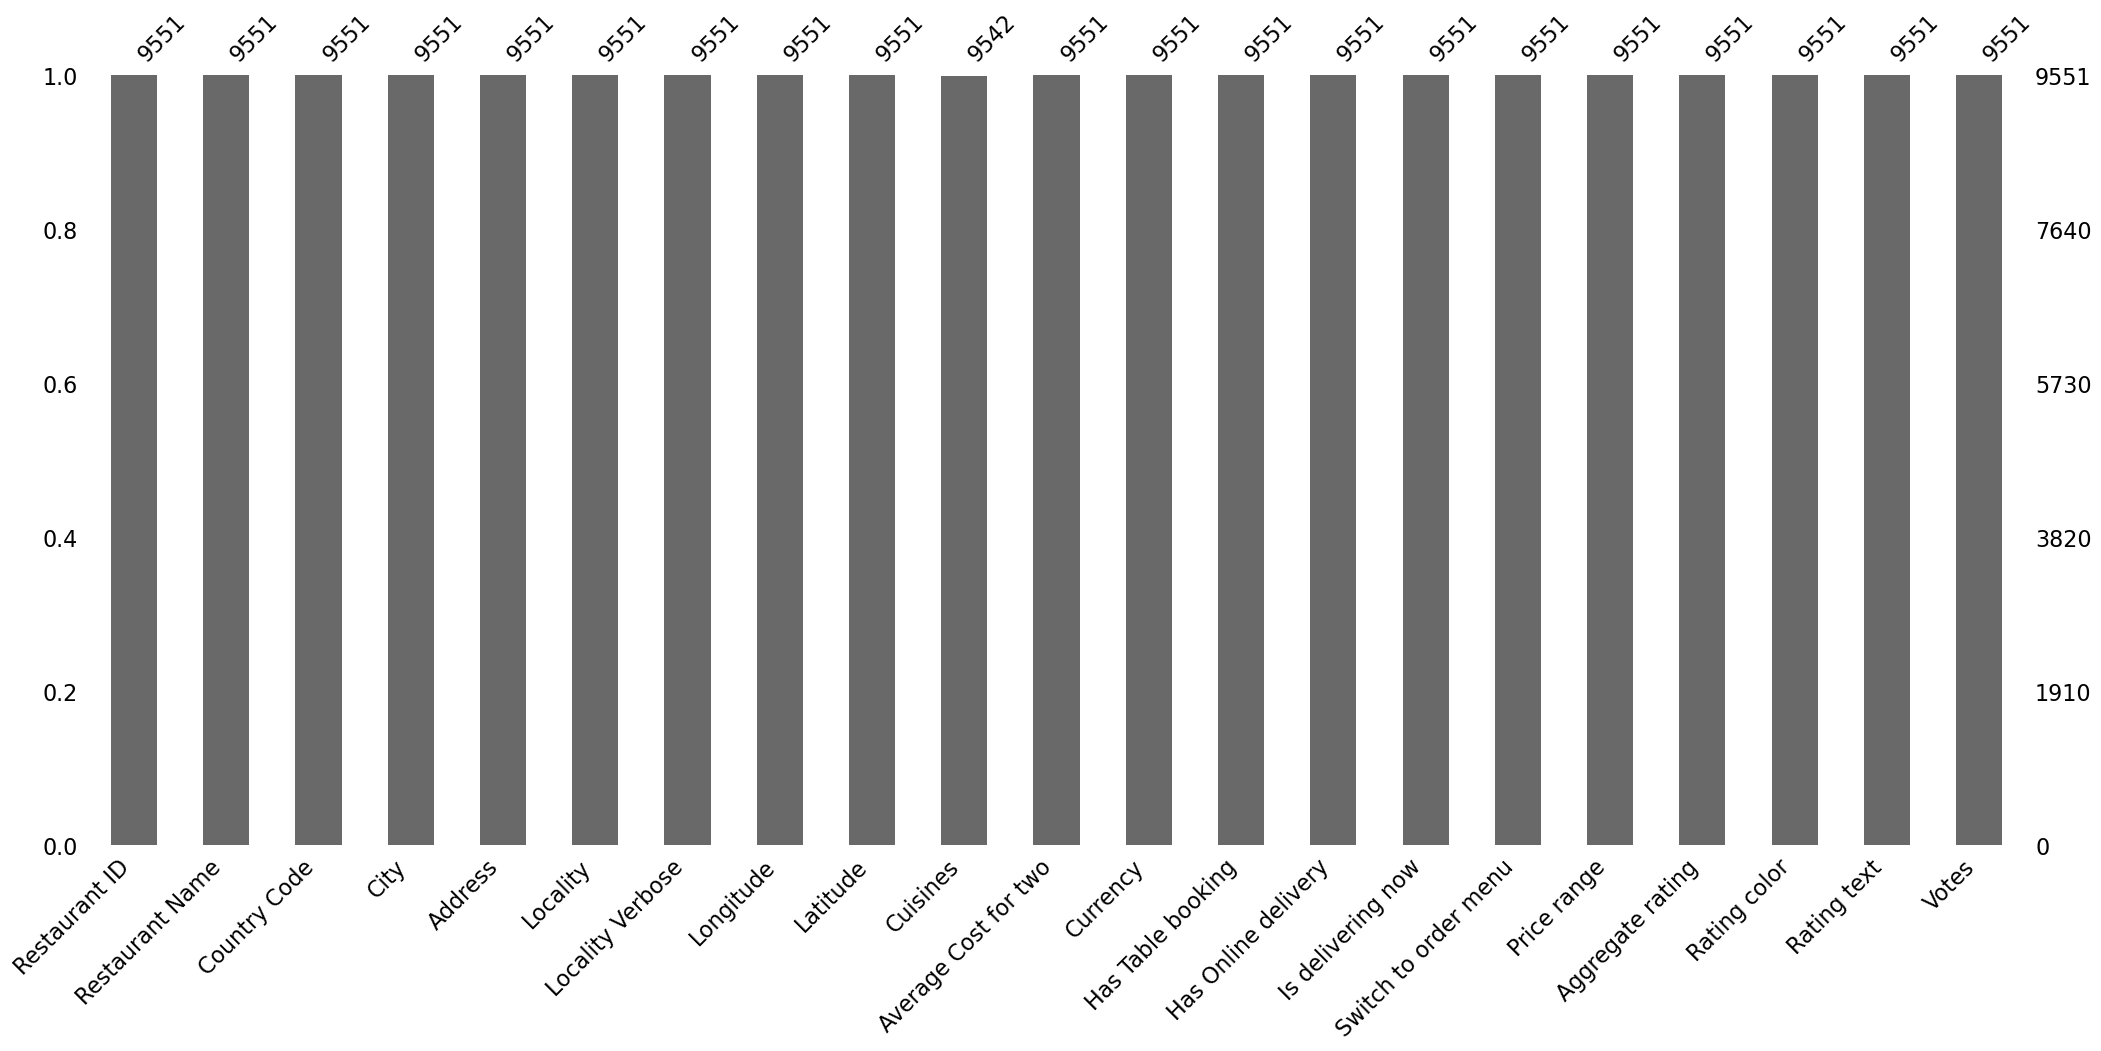

In [76]:
msno.bar(df)
plt.show()

In [83]:
#Handling the missing values of Cuisines
cuisine_most_freq = df['Cuisines'].mode()[0]
df['Cuisines'].fillna(cuisine_most_freq,inplace = True)

In [65]:
#checking duplicate values
df.duplicated().any()

False

## Level 1

### Task 1 - Top Cuisines

In [113]:
#Determining top three common Cuisines
top_cuisine = df['Cuisines'].value_counts().iloc[:3]

#Calculating the percentage of restaurants that serve each of the top cuisines
top_cuisine_percent = ((top_cuisine/df['Cuisines'].size))*100

print(top_cuisine_percent)

Cuisines
North Indian             9.894252
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64


### Task 2 - City Analysis

In [178]:
#Identifying the city with the highest number of restaurants
Top_city = df['City'].value_counts().idxmax()

# Calculating the average rating for restaurants in each city
Avg_rating = df.groupby(['City'])['Aggregate rating'].mean()

#Determining the city with the highest average rating
highest_avg_rating_city = Avg_rating.idxmax()


print('City with highest number of Restaurant: ',Top_city,'\n')
print('Average rating for restaurants in each city: ',Avg_rating,'\n')
print('City with highest average rating: ',highest_avg_rating_city)


City with highest number of Restaurant:  New Delhi 

Average rating for restaurants in each city:  City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64 

City with highest average rating:  Inner City


### Task 3: Price Range Distribution


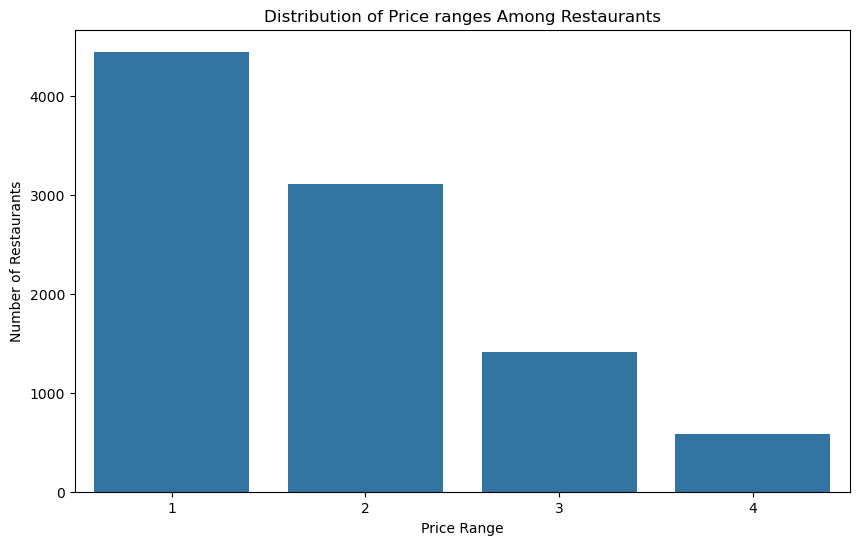

Percentage of restaurants in each price range category:  Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


In [212]:
# Visualizing the distribution of price ranges among the restaurants
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Price range', order=df['Price range'].value_counts().index)
plt.title('Distribution of Price ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()

# Calculating the percentage of restaurants in each price range category
Percent_of_restaurant = ((df['Price range'].value_counts()/df['Price range'].size))*100
print('Percentage of restaurants in each price range category: ',Percent_of_restaurant)


### Task 4: Online Delivery

The percentage of restaurants that offer online delivery:  25.662234321013504 



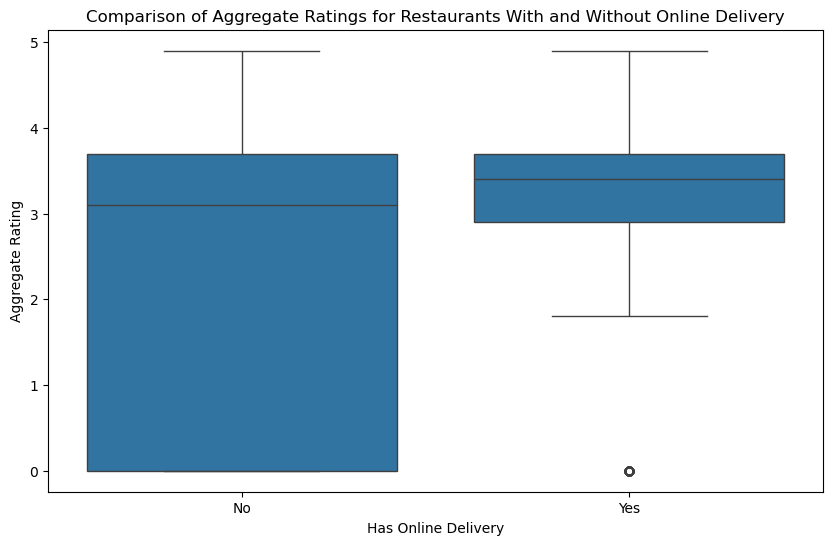

In [246]:
# Determining the percentage of restaurants that offer online delivery
online_delivery = (df['Has Online delivery'].eq('Yes').mean())*100
print('The percentage of restaurants that offer online delivery: ',online_delivery,'\n')

#Comparing average ratings of restaurants with and without online delivery
df['Has Online delivery'] = df['Has Online delivery'].astype('category')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=df)
plt.title('Comparison of Aggregate Ratings for Restaurants With and Without Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Aggregate Rating')
plt.show()